In [1]:
pip install polars

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 810.4/810.4 kB 10.3 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.2/40.2 MB 37.3 MB/s  0:00:01 eta 0:00:010:0101
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [polars]━━━━ 1/2 [polars]

[notice] A new release of pip is available: 25.2 -> 26.0.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install --upgrade pip

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 17.9 MB/s  0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 25.2
    Uninstalling pip-25.2:
      Successfully uninstalled pip-25.2
Note: you may need to restart the kernel to use updated packages.


In [3]:
import polars as pl

In [ ]:
pip install pandas

256.78s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 37.3 MB/s  0:00:006.3 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 50.9 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━╺━━━━━━━━━━━━━━━━━━━ 1/2 [pandas]

In [7]:
import pandas as pd

df_sample = pd.read_csv("Desktop/autoscout24_dataset_20251108.csv", nrows=1000)
print(df_sample.info())

<class 'pandas.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 75 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   id                                    1000 non-null   str    
 1   description                           956 non-null    str    
 2   ratings_average                       635 non-null    str    
 3   ratings_count                         635 non-null    float64
 4   ratings_recommend_percentage          635 non-null    float64
 5   price_currency                        1000 non-null   str    
 6   price                                 1000 non-null   float64
 7   price_tax_deductible                  1000 non-null   bool   
 8   price_negotiable                      1000 non-null   bool   
 9   price_net                             279 non-null    float64
 10  price_vat_rate                        262 non-null    float64
 11  vin                          

In [77]:
cols = [
    "id",
    "make",
    "model",
    "registration_date",
    "production_year",
    "price",
    "mileage_km_raw",
    "fuel_category",
    "cylinders_volume_cc",
    "body_type",
    "fuel_cons_comb_l100_km",
    "fuel_cons_comb_l100_wltp_km",
    "fuel_cons_electric_comb_l100_wltp_km"
]

df = pd.read_csv("Desktop/autoscout24_dataset_20251108.csv", usecols=cols)

In [78]:
df["year"] = df["production_year"]

df["registration_year"] = pd.to_datetime(
    df["registration_date"],
    errors="coerce"
).dt.year

df["year"] = df["year"].fillna(df["registration_year"])

df.drop(columns=[
    "production_year",
    "registration_date",
    "registration_year"
], inplace=True)

In [11]:
# Numeric downcasting
num_cols = [
    "year",
    "price",
    "mileage_km_raw",
    "cylinders_volume_cc",
    "fuel_cons_comb_l100_km",
    "fuel_cons_comb_l100_wltp_km",
    "fuel_cons_electric_comb_l100_wltp_km"
]

for col in num_cols:
    df[col] = pd.to_numeric(df[col], downcast="float")

# Convert to category
cat_cols = ["make", "model", "fuel_category", "body_type"]

for col in cat_cols:
    df[col] = df[col].astype("category")

In [79]:
df.shape

(118382, 12)

In [80]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 118382 entries, 0 to 118381
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   id                                    118382 non-null  str    
 1   price                                 118382 non-null  float64
 2   make                                  118382 non-null  str    
 3   model                                 116980 non-null  str    
 4   mileage_km_raw                        117738 non-null  float64
 5   body_type                             118382 non-null  str    
 6   cylinders_volume_cc                   106096 non-null  float64
 7   fuel_category                         118309 non-null  str    
 8   fuel_cons_comb_l100_km                41844 non-null   float64
 9   fuel_cons_comb_l100_wltp_km           30270 non-null   float64
 10  fuel_cons_electric_comb_l100_wltp_km  4926 non-null    float64
 11  year       

In [81]:
df.isna().mean().sort_values(ascending=False)

fuel_cons_electric_comb_l100_wltp_km    0.958389
fuel_cons_comb_l100_wltp_km             0.744302
fuel_cons_comb_l100_km                  0.646534
cylinders_volume_cc                     0.103783
model                                   0.011843
mileage_km_raw                          0.005440
year                                    0.001318
fuel_category                           0.000617
id                                      0.000000
price                                   0.000000
make                                    0.000000
body_type                               0.000000
dtype: float64

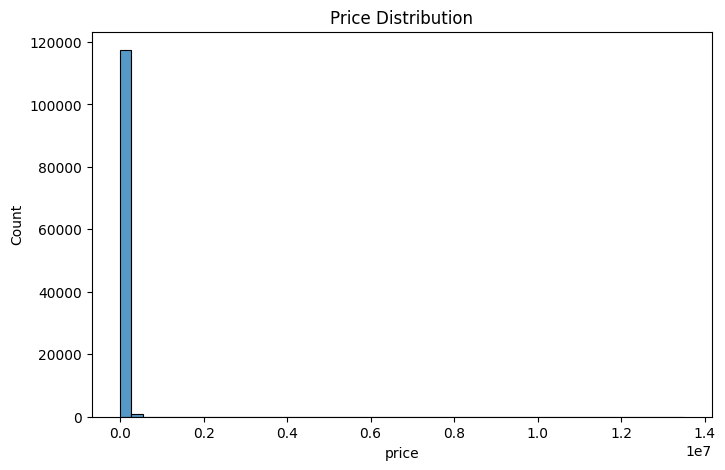

In [122]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.histplot(df["price"], bins=50)
plt.title("Price Distribution")
plt.show()

In [82]:
df["price"].describe()

count    1.183820e+05
mean     5.751598e+04
std      1.099858e+05
min      1.000000e+00
25%      2.399000e+04
50%      3.998000e+04
75%      6.995000e+04
max      1.350000e+07
Name: price, dtype: float64

In [83]:
df["price"].sort_values(ascending=False).head(10)

50280     13500000.0
16344      9500000.0
109272     8627500.0
75347      7080500.0
31379      6800000.0
118259     6799000.0
4497       5700000.0
99770      5600000.0
15652      5500000.0
43225      5429000.0
Name: price, dtype: float64

In [84]:
upper_limit = df["price"].quantile(0.99)
df_clean = df[df["price"] < upper_limit]

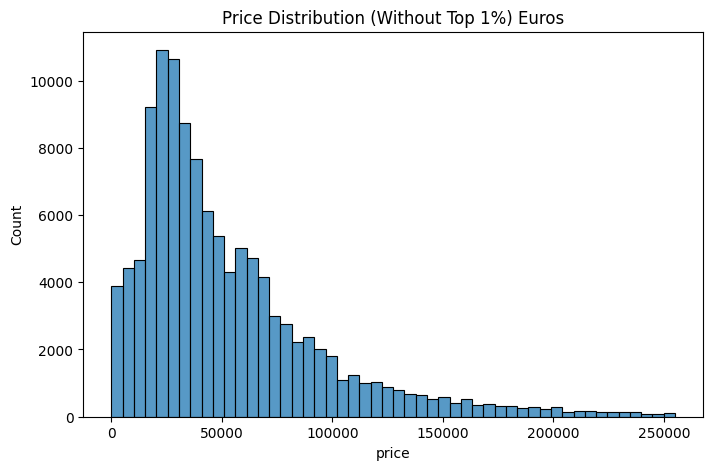

In [85]:
plt.figure(figsize=(8,5))
sns.histplot(df_clean["price"], bins=50)
plt.title("Price Distribution (Without Top 1%) Euros")
plt.show()

In [87]:
#Price Distribution Insights

#The price distribution is strongly right-skewed.

#Most vehicles are concentrated between 20k–60k.

#A long tail extends beyond 150k.

# Top 1% of extreme outliers were removed for visualization clarity.

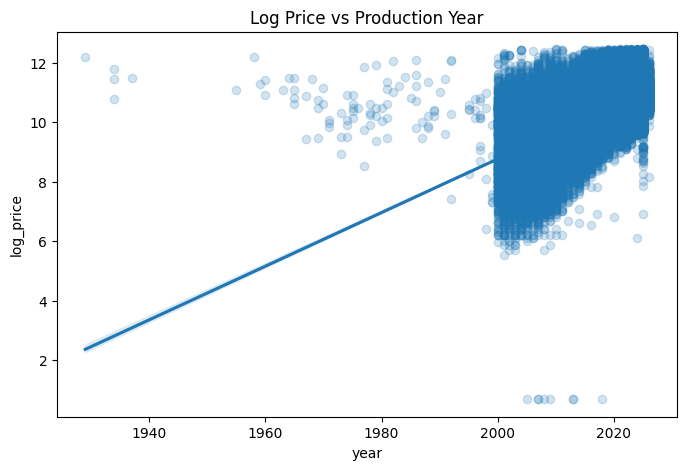

In [88]:
import numpy as np

df_clean["log_price"] = np.log1p(df_clean["price"])

plt.figure(figsize=(8,5))
sns.regplot(
    x="year",
    y="log_price",
    data=df_clean,
    scatter_kws={"alpha":0.2}
)
plt.title("Log Price vs Production Year")
plt.show()

In [89]:
df_clean["year"].describe()

count    117080.000000
mean       2019.797506
std           5.633233
min        1929.000000
25%        2018.000000
50%        2021.000000
75%        2025.000000
max        2026.000000
Name: year, dtype: float64

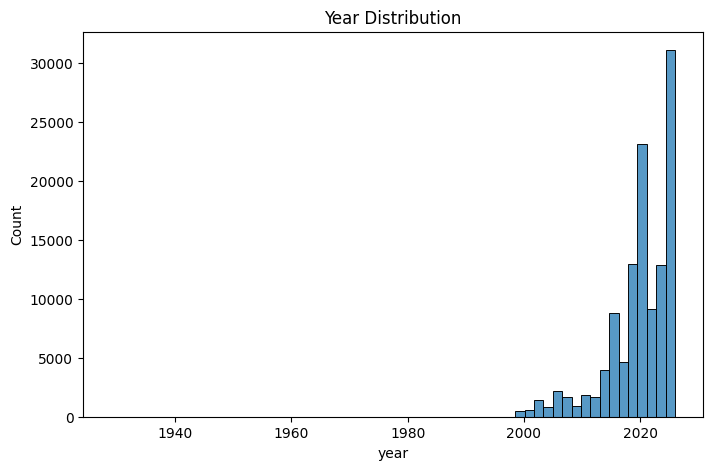

In [90]:
plt.figure(figsize=(8,5))
sns.histplot(df["year"], bins=60)
plt.title("Year Distribution")
plt.show()

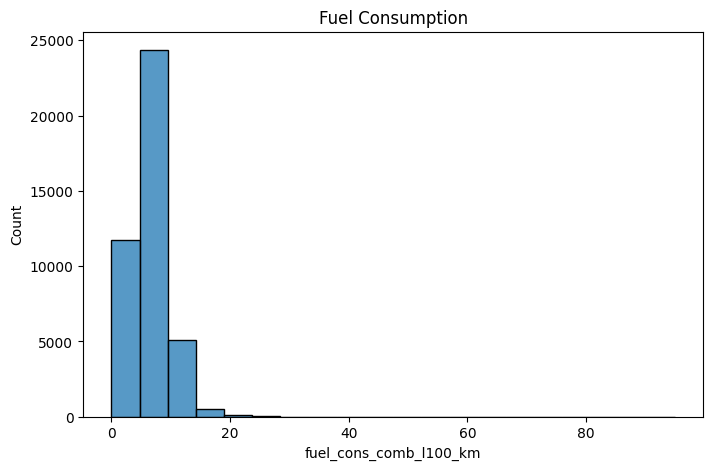

In [121]:
plt.figure(figsize=(8,5))
sns.histplot(df["fuel_cons_comb_l100_km"], bins=20)
plt.title("Fuel Consumption")
plt.show()

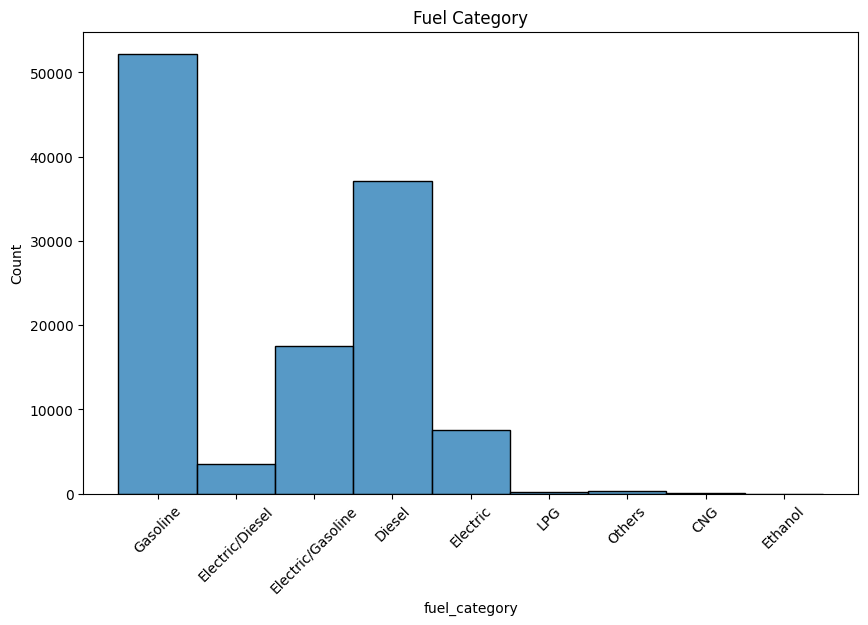

In [118]:
plt.figure(figsize=(10,6))
sns.histplot(df["fuel_category"], bins=60)
plt.title("Fuel Category")
plt.xticks(rotation=45)
plt.show()

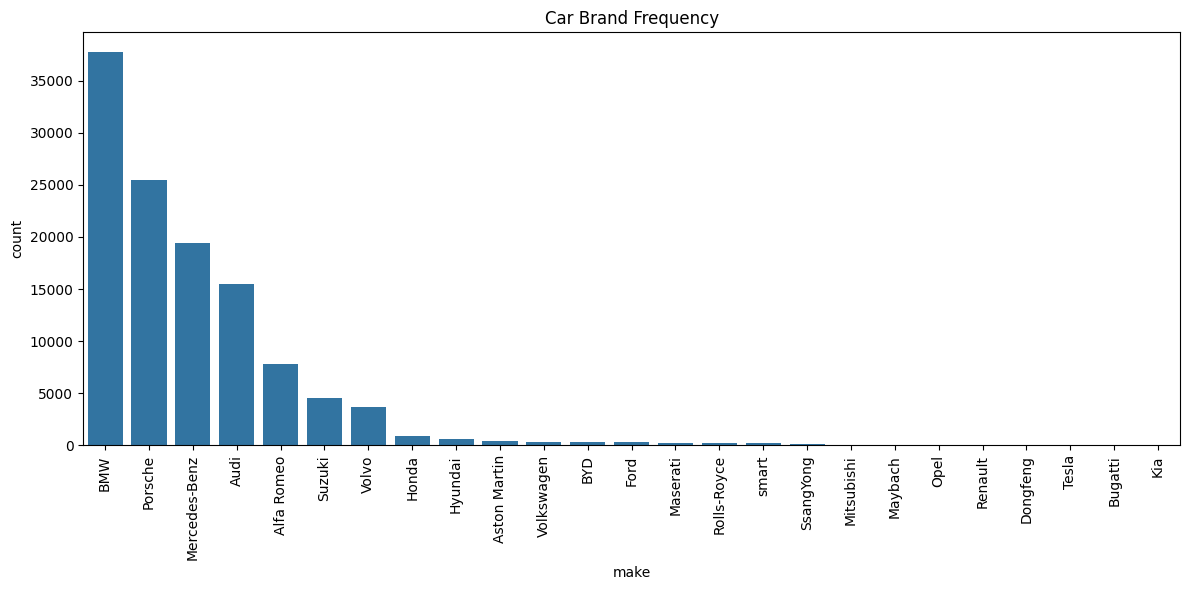

In [94]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, x="make", order=df["make"].value_counts().index)
plt.xticks(rotation=90)
plt.title("Car Brand Frequency")
plt.tight_layout()
plt.show()

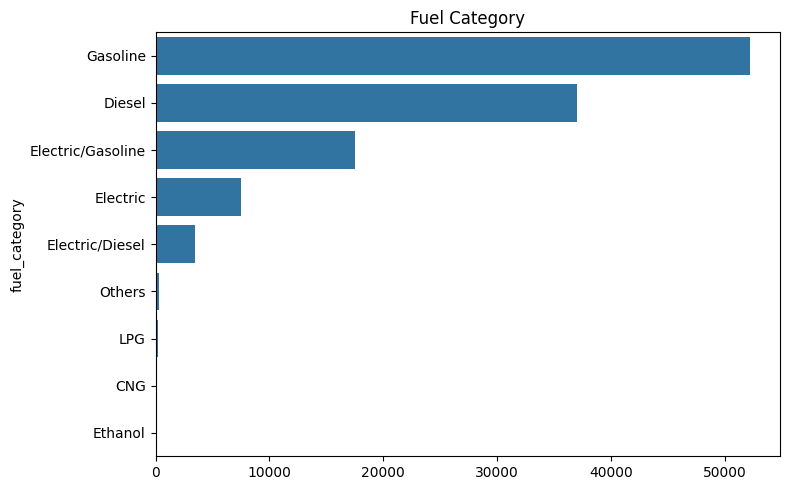

In [96]:
counts_fuel = df["fuel_category"].value_counts()

plt.figure(figsize=(8,5))
sns.barplot(y=counts_fuel.index, x=counts_fuel.values)
plt.title("Fuel Category")
plt.tight_layout()
plt.show()

In [97]:
df.to_csv("autoscoutdf.csv", index=False)

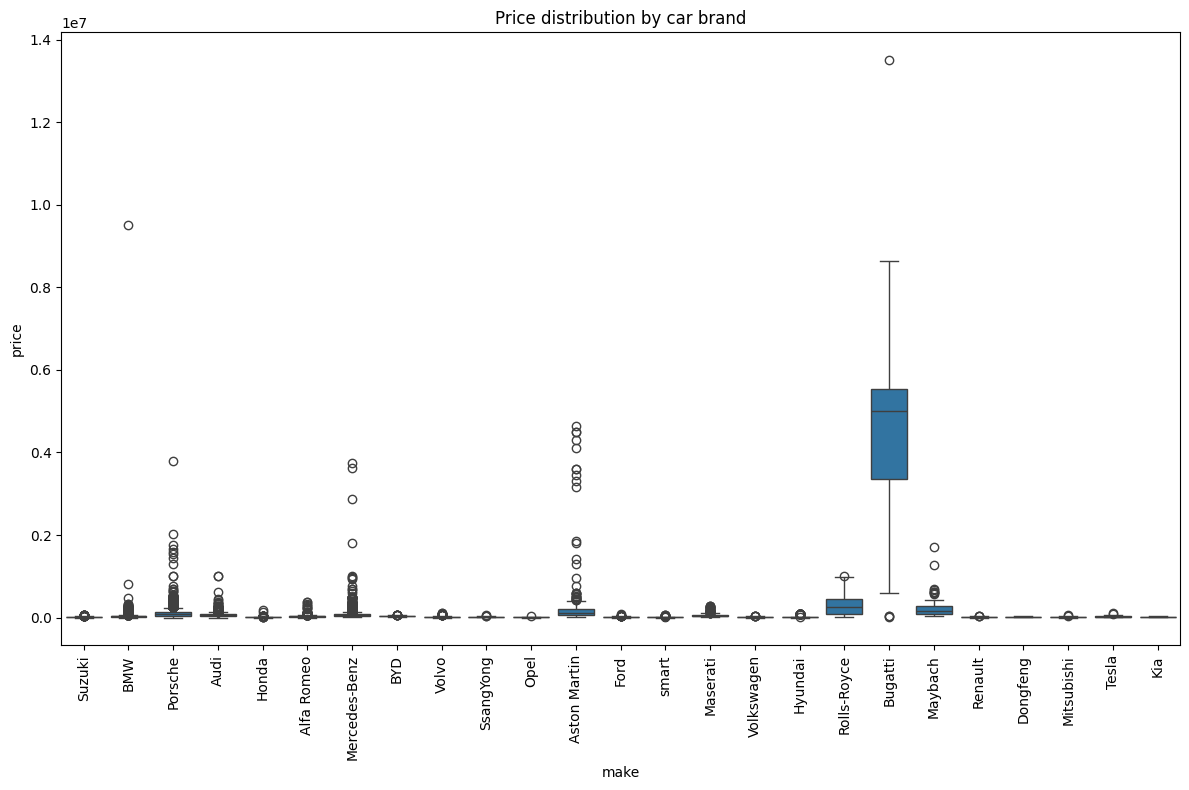

In [98]:
plt.figure(figsize=(12,8))
sns.boxplot(data=df, x="make", y="price")
plt.xticks(rotation=90)
plt.title("Price distribution by car brand")
plt.tight_layout()
plt.show()

In [99]:
df.groupby("make")["price"].mean().sort_values(ascending=False)

make
Bugatti          4.550384e+06
Rolls-Royce      2.806976e+05
Maybach          2.507136e+05
Aston Martin     2.489276e+05
Porsche          9.777541e+04
Mercedes-Benz    7.065229e+04
Maserati         6.245030e+04
Audi             5.888835e+04
BYD              3.750224e+04
BMW              3.447126e+04
Tesla            3.064492e+04
Alfa Romeo       2.672806e+04
Kia              2.072920e+04
Dongfeng         1.952602e+04
SsangYong        1.941620e+04
Hyundai          1.725858e+04
Volvo            1.707836e+04
Suzuki           1.674616e+04
smart            1.580308e+04
Mitsubishi       1.550770e+04
Renault          1.320090e+04
Volkswagen       1.199204e+04
Honda            1.180711e+04
Ford             1.164386e+04
Opel             1.107020e+04
Name: price, dtype: float64

In [100]:
avg_price = df.groupby("make", as_index=False)["price"].mean()
avg_price.sort_values("price", ascending=False)

,make,price
5,Bugatti,4.550384e+06
18,Rolls-Royce,2.806976e+05
12,Maybach,2.507136e+05
1,Aston Martin,2.489276e+05
16,Porsche,9.777541e+04
13,Mercedes-Benz,7.065229e+04
11,Maserati,6.245030e+04
2,Audi,5.888835e+04
4,BYD,3.750224e+04
3,BMW,3.447126e+04


In [101]:
import scipy.stats as stats

groups = [g["price"].dropna() for _, g in df.groupby("make")]
stats.f_oneway(*groups)

F_onewayResult(statistic=np.float64(4534.412090338282), pvalue=np.float64(0.0))

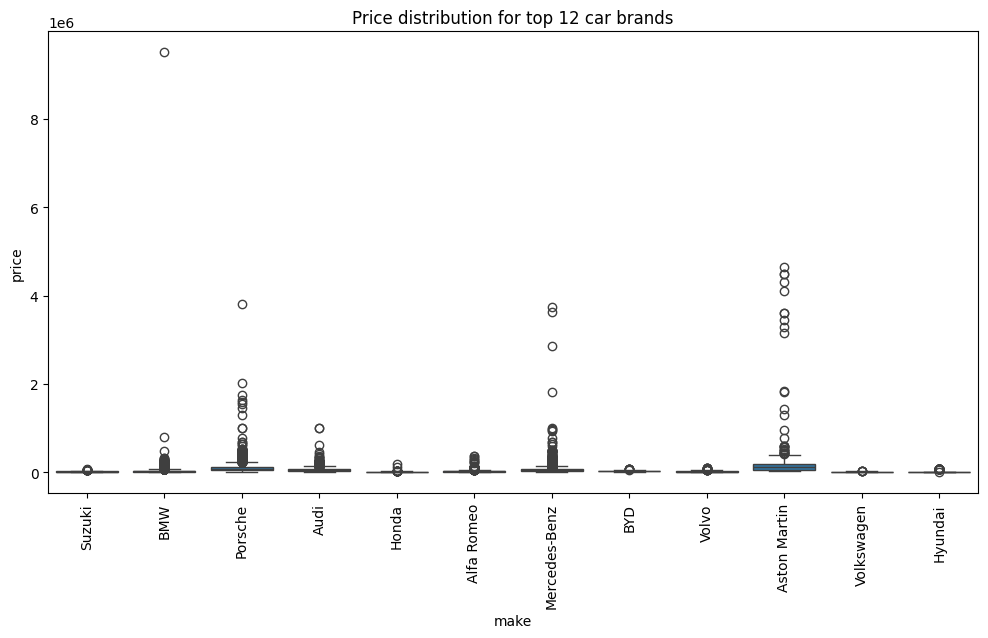

In [114]:
top_brands = df["make"].value_counts().nlargest(12).index

plt.figure(figsize=(12,6))
sns.boxplot(data=df[df["make"].isin(top_brands)], x="make", y="price")
plt.xticks(rotation=90)
plt.title("Price distribution for top 12 car brands")
plt.show()

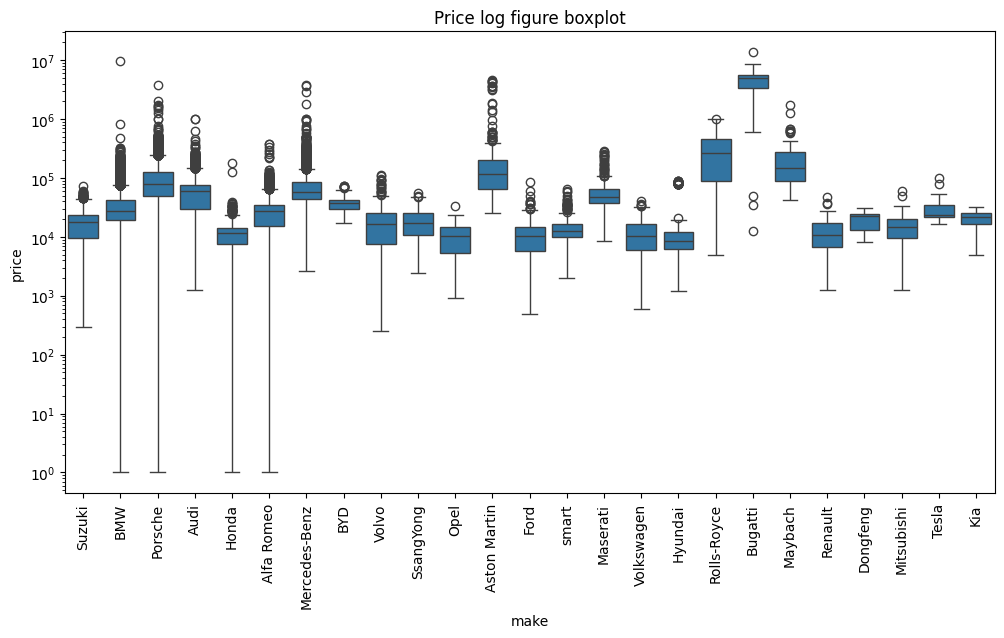

In [123]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x="make", y="price")
plt.yscale("log")
plt.xticks(rotation=90)
plt.title("Price log figure boxplot")
plt.show()

In [104]:
df.groupby("make")["year"].min()

make
Alfa Romeo       2000.0
Aston Martin     1958.0
Audi             1992.0
BMW              1999.0
BYD              2022.0
Bugatti          1935.0
Dongfeng         2019.0
Ford             2002.0
Honda            2009.0
Hyundai          2013.0
Kia              2014.0
Maserati         1970.0
Maybach          2003.0
Mercedes-Benz    2015.0
Mitsubishi       1987.0
Opel             2003.0
Porsche          1963.0
Renault          1995.0
Rolls-Royce      1929.0
SsangYong        1997.0
Suzuki           2000.0
Tesla            2015.0
Volkswagen       1998.0
Volvo            2000.0
smart            2000.0
Name: year, dtype: float64

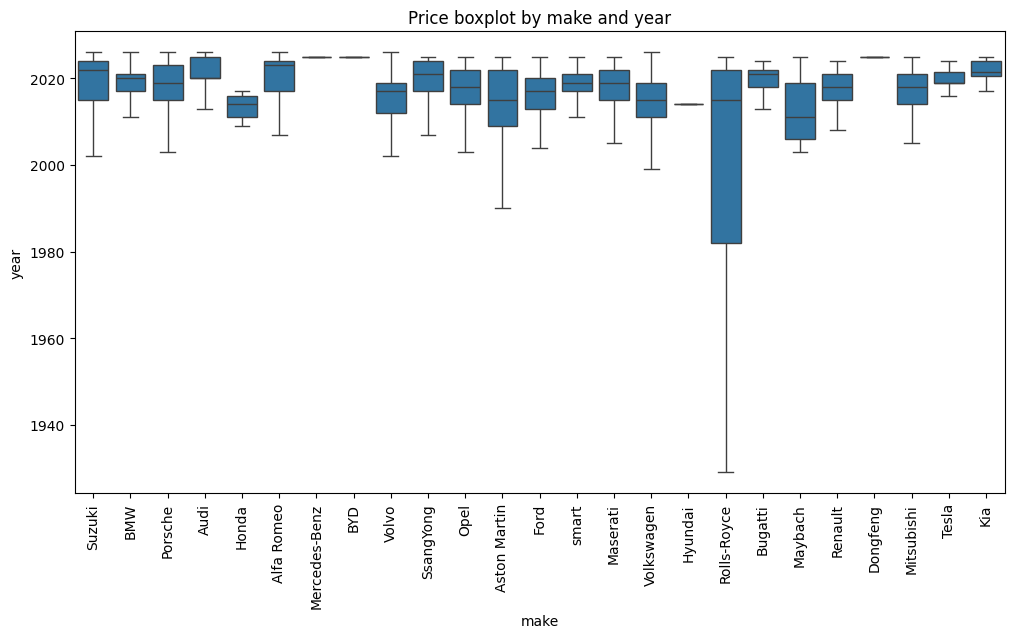

In [136]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x="make", y="year",showfliers=False)
plt.xticks(rotation=90)
plt.title("Price boxplot by make and year")
plt.show()

In [137]:
upper = df["price"].quantile(0.99)
df_filtered = df[df["price"] <= upper]


df_filtered = df[~df["make"].isin(luxury_brands)]

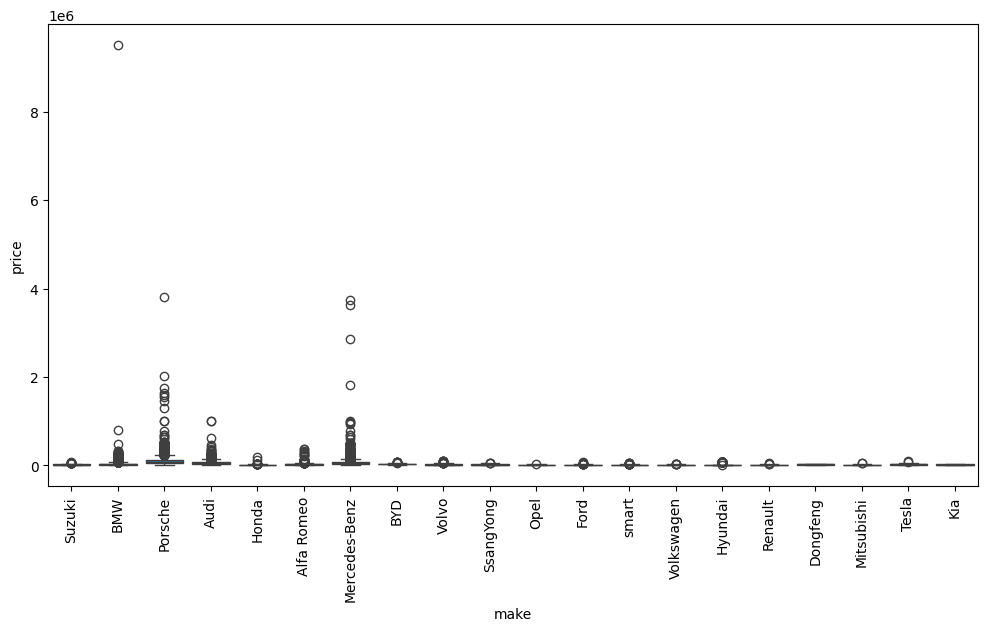

In [138]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df_filtered, x="make", y="price")
plt.xticks(rotation=90)
plt.show()

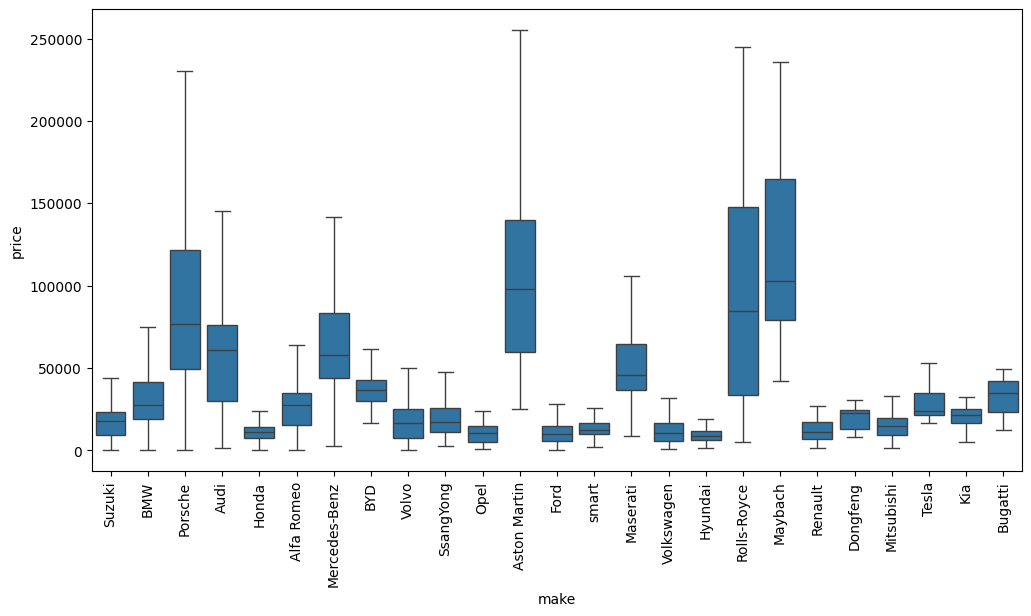

In [134]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df_filtered, x="make", y="price", showfliers=False)
plt.xticks(rotation=90)
plt.show()

In [166]:
df_normal = df.copy()

luxury_brands = [
    "Bugatti", "Rolls-Royce", "Maybach", "Ferrari", "Lamborghini",
    "Bentley", "Aston Martin", "Maserati", "Porsche"
]

df_normal = df_normal[~df_normal["make"].isin(luxury_brands)]

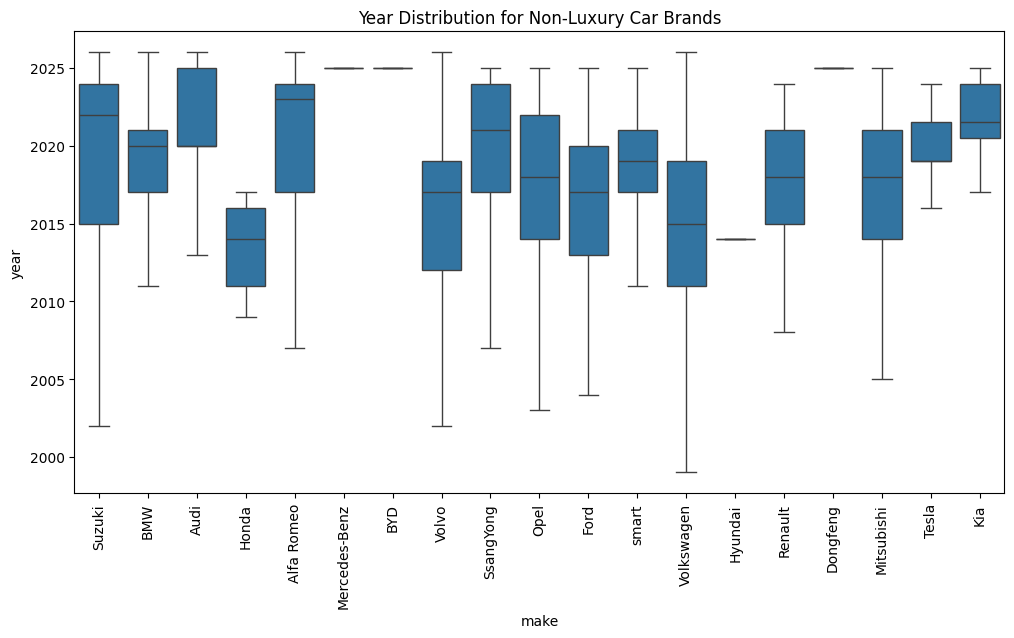

In [167]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df_normal, x="make", y="year", showfliers=False)
plt.xticks(rotation=90)
plt.title("Year Distribution for Non-Luxury Car Brands")
plt.show()

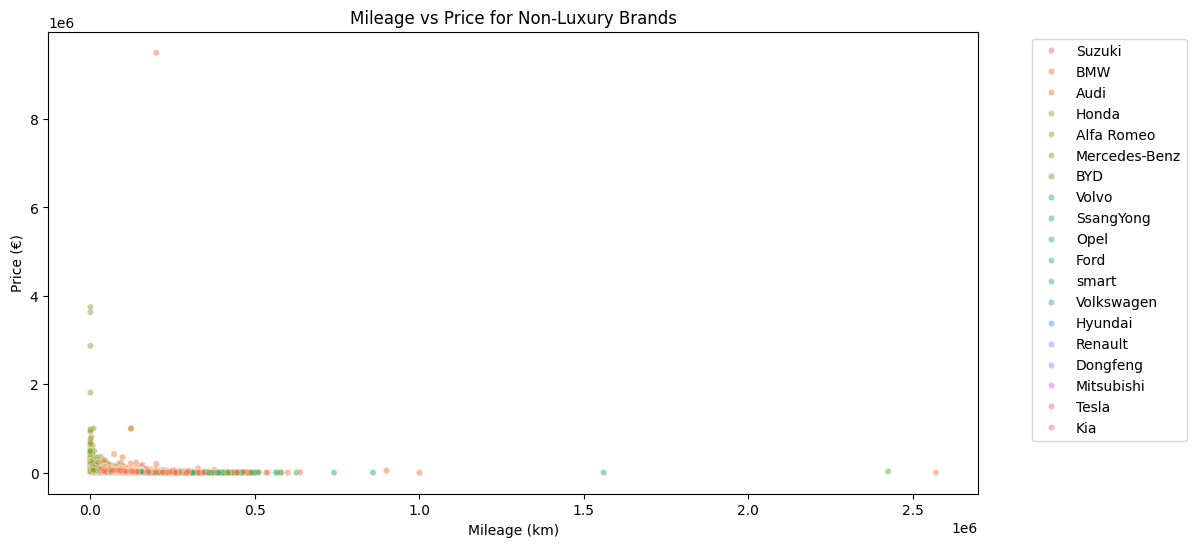

In [168]:
plt.figure(figsize=(12,6))
sns.scatterplot(
    data=df_normal,
    x="mileage_km_raw",
    y="price",
    hue="make",
    alpha=0.5,
    s=20
)
plt.title("Mileage vs Price for Non-Luxury Brands")
plt.xlabel("Mileage (km)")
plt.ylabel("Price (€)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [157]:
df_normal2 = df_normal[df_normal["price"] <= 150000]

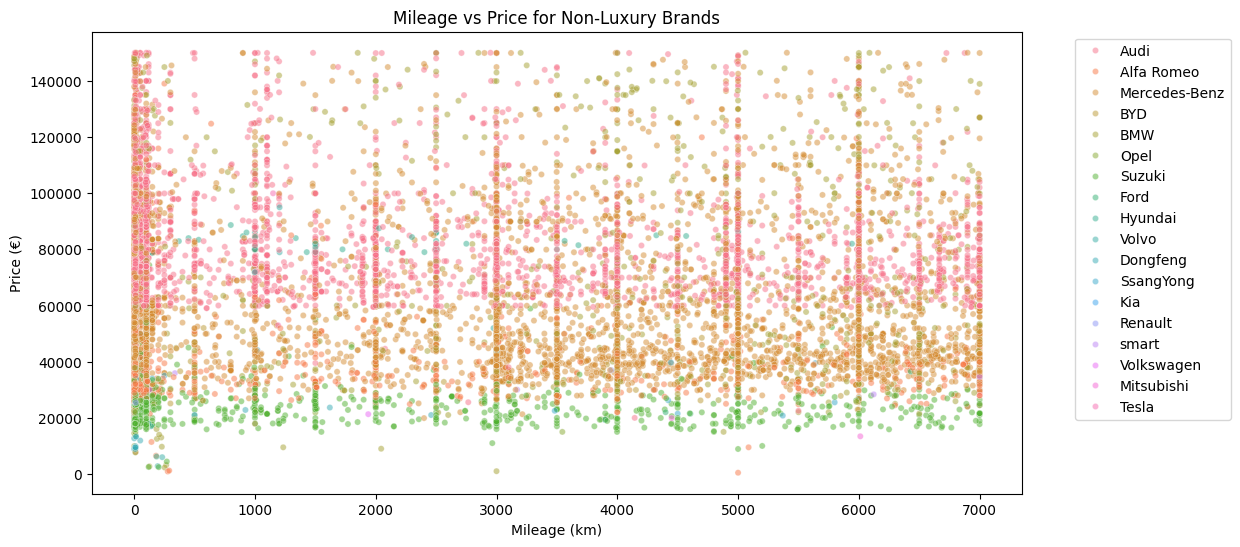

In [169]:
plt.figure(figsize=(12,6))
sns.scatterplot(
    data=df_normal2,
    x="mileage_km_raw",
    y="price",
    hue="make",
    alpha=0.5,
    s=20
)
plt.title("Mileage vs Price for Non-Luxury Brands")
plt.xlabel("Mileage (km)")
plt.ylabel("Price (€)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [171]:
df_normal.groupby("make")["mileage_km_raw"].max()

make
Alfa Romeo        490000.0
Audi              342384.0
BMW              2570000.0
BYD              2424696.0
Dongfeng           21000.0
Ford              475071.0
Honda             580000.0
Hyundai           330000.0
Kia               198000.0
Mercedes-Benz     367000.0
Mitsubishi        271112.0
Opel              290000.0
Renault           237531.0
SsangYong         288000.0
Suzuki            425000.0
Tesla             229580.0
Volkswagen        354974.0
Volvo            1560000.0
smart             168000.0
Name: mileage_km_raw, dtype: float64

In [172]:
brand_year_mileage = (
    df_normal.groupby(["make", "year"])["mileage_km_raw"]
    .max()
    .reset_index()
)

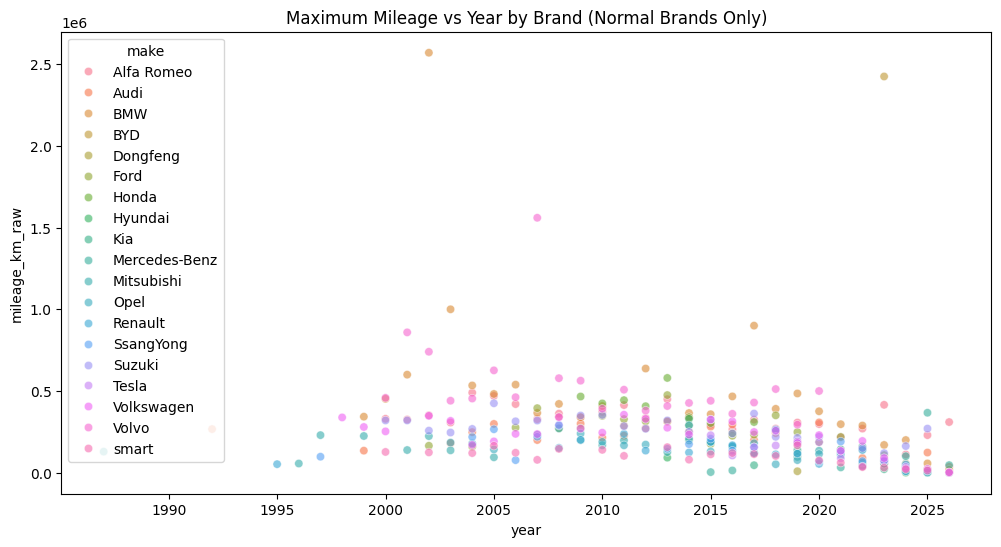

In [173]:
plt.figure(figsize=(12,6))
sns.scatterplot(
    data=brand_year_mileage,
    x="year",
    y="mileage_km_raw",
    hue="make",
    alpha=0.6
)
plt.title("Maximum Mileage vs Year by Brand (Normal Brands Only)")
plt.show()

In [174]:
df_normal["mileage_km_raw"].max()

np.float64(2570000.0)

In [185]:
df_normal_cap = df_normal[
    (df_normal["price"] <= 600_000) &
    (df_normal["mileage_km_raw"] <= 800_000)
]

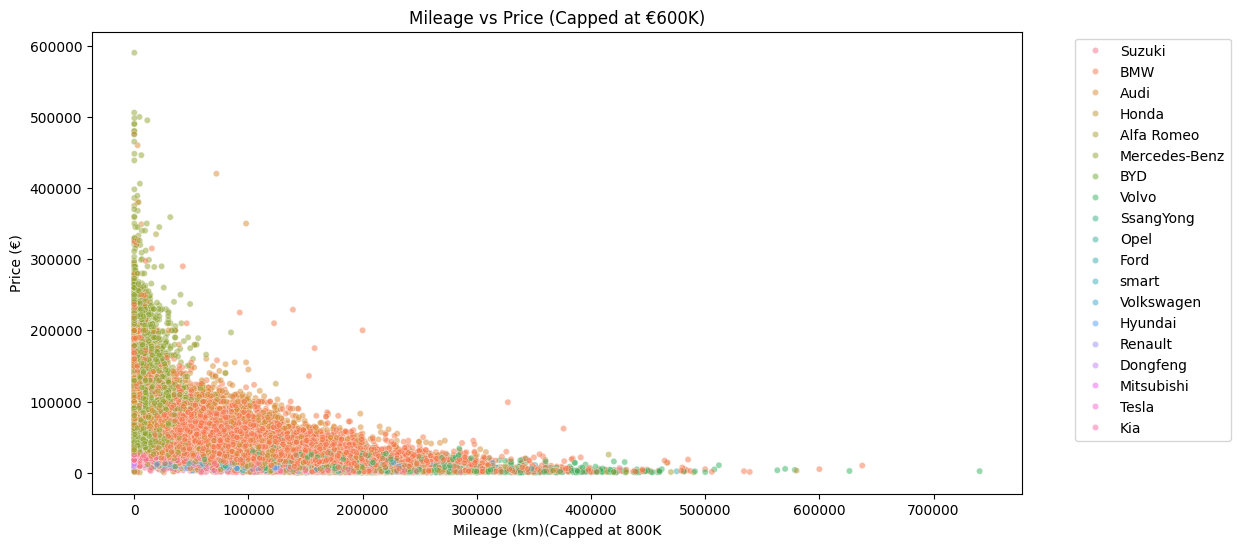

In [187]:
plt.figure(figsize=(12,6))
sns.scatterplot(
    data=df_normal_cap,
    x="mileage_km_raw",
    y="price",
    hue="make",
    alpha=0.5,
    s=20
)
plt.title("Mileage vs Price (Capped at €600K)")
plt.xlabel("Mileage (km)(Capped at 800K")
plt.ylabel("Price (€)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


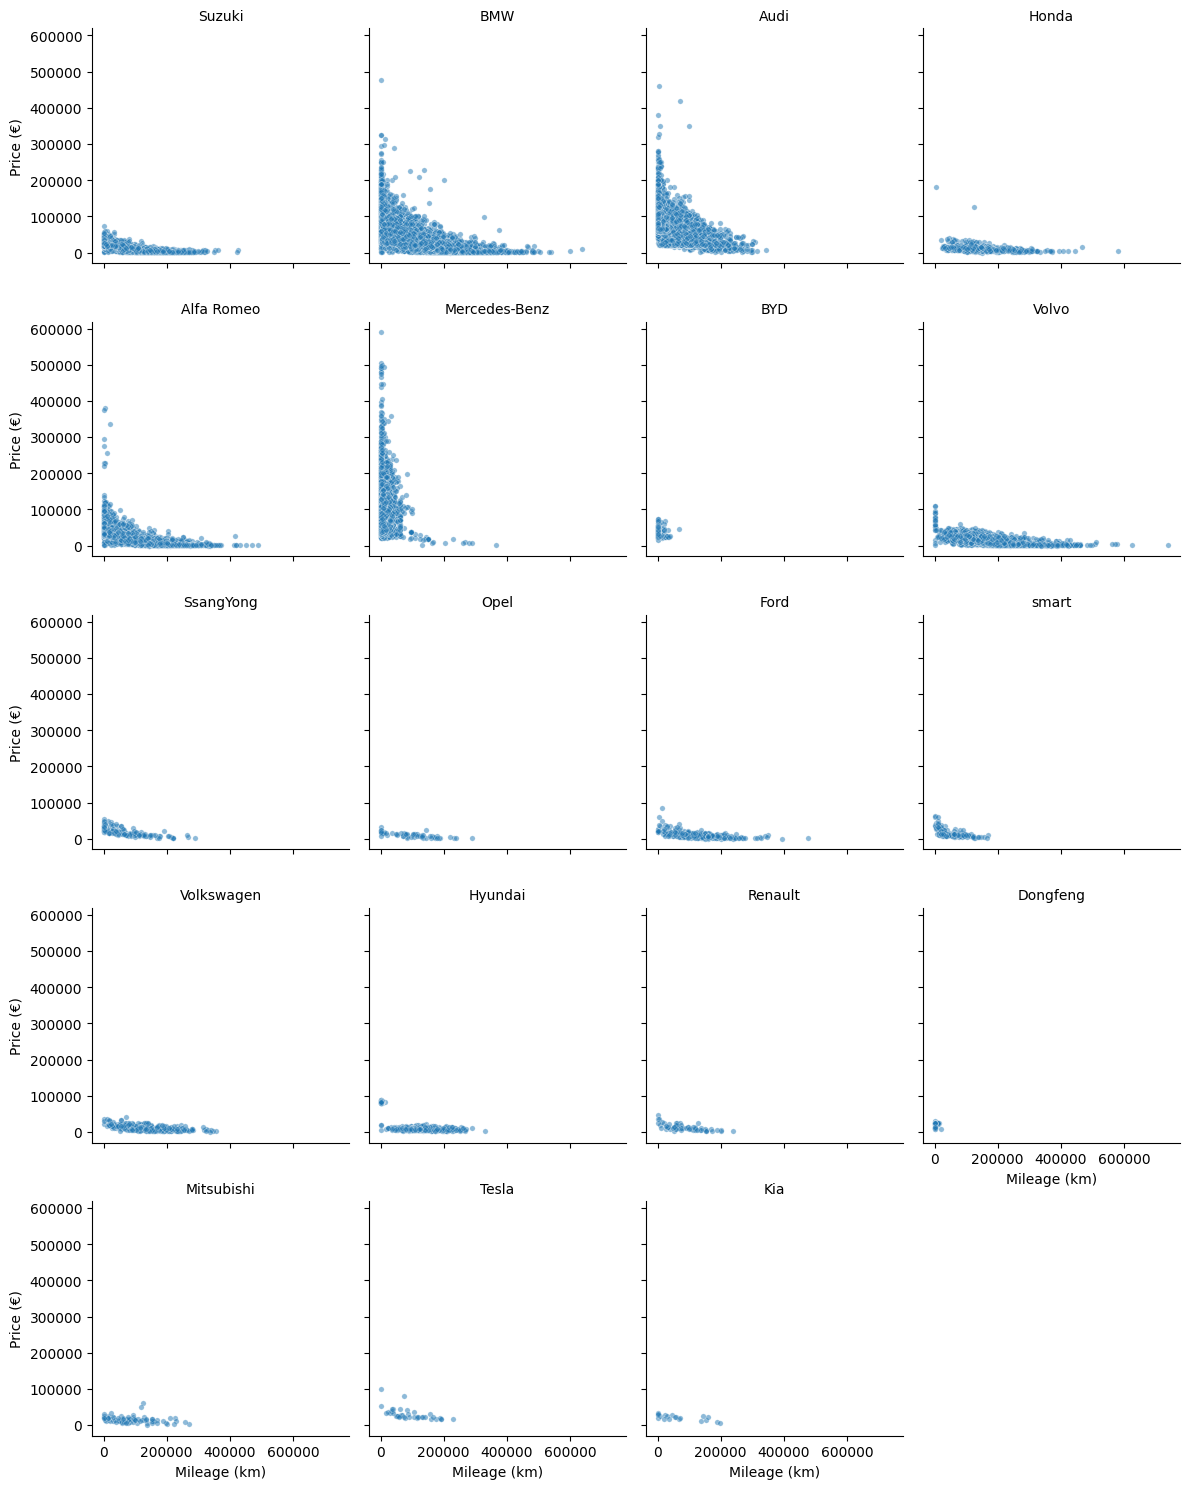

In [190]:
g = sns.FacetGrid(
    df_normal_cap,
    col="make",
    col_wrap=4,
    height=3,
    sharex=True,
    sharey=True
)
g.map_dataframe(sns.scatterplot, x="mileage_km_raw", y="price", alpha=0.5, s=15)
g.set_titles("{col_name}")
g.set_axis_labels("Mileage (km)", "Price (€)")
plt.savefig("mileage_vs_price.jpg", format="jpg", dpi=300, bbox_inches="tight")
plt.show()

In [191]:
df['make'].unique()

<StringArray>
[       'Suzuki',           'BMW',       'Porsche',          'Audi',
         'Honda',    'Alfa Romeo', 'Mercedes-Benz',           'BYD',
         'Volvo',     'SsangYong',          'Opel',  'Aston Martin',
          'Ford',         'smart',      'Maserati',    'Volkswagen',
       'Hyundai',   'Rolls-Royce',       'Bugatti',       'Maybach',
       'Renault',      'Dongfeng',    'Mitsubishi',         'Tesla',
           'Kia']
Length: 25, dtype: str